In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]


# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print tip + '正确率：', np.mean(acc)

path = '..\\10.Regression\\10.iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x, y = np.split(data, (4,), axis=1)
x = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)


In [3]:
# 分类器
# clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:

# 准确率
print "training test",clf.score(x_train, y_train)  # 精度
print "test data",clf.score(x_test, y_test)



training test 0.866666666667
test data 0.65


In [15]:
# decision_function
print 'decision_function:\n', clf.decision_function(x_train)[:5]


decision_function:
[[ 2.45540648  0.80337522 -0.2587817 ]
 [-0.4368348   2.31950945  1.11732536]
 [-0.43793789  1.00917055  2.42876733]
 [ 2.45555373  0.80242493 -0.25797866]
 [ 2.46185007  0.80020899 -0.26205906]]


In [13]:
print '\npredict:\n', clf.predict(x_train)


predict:
[ 0.  1.  2.  0.  0.  2.  0.  1.  2.  2.  1.  2.  1.  0.  1.  2.  2.  1.
  2.  1.  0.  0.  0.  2.  0.  1.  2.  1.  0.  0.  1.  0.  2.  1.  2.  2.
  1.  2.  2.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  2.  1.  2.  0.  0.
  1.  0.  1.  0.  2.  1.  0.  2.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.
  1.  0.  2.  1.  1.  1.  1.  0.  0.  1.  1.  2.  1.  2.  2.  1.  2.  0.]


[ 1.  1.  1. ...,  1.  1.  1.]


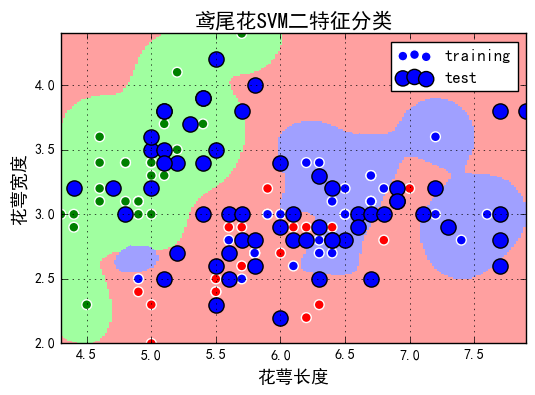

In [28]:
# 画图
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
# print 'grid_test = \n', grid_test
# Z = clf.decision_function(grid_test)    # 样本到决策面的距离
# print Z
grid_hat = clf.predict(grid_test)       # 预测分类值
print grid_hat
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='w', s=50, cmap=cm_dark,label="training")      # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], s=120,cmap=cm_dark,label="test")     # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend()
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
plt.grid()
plt.show()

In [30]:
clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
#clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())

# 准确率
print 'training',clf.score(x_train, y_train)  # 精度
print '测试集',clf.score(x_test, y_test)

training 0.8
测试集 0.8


In [31]:
# decision_function
print 'decision_function:\n', clf.decision_function(x_train)[:5]
print '\npredict:\n', clf.predict(x_train)

decision_function:
[[ 2.22976777  0.93523902 -0.16500679]
 [-0.12204492  2.11891317  1.00313176]
 [-0.23499985  1.11410221  2.12089764]
 [ 2.16897433  0.99886921 -0.16784355]
 [ 2.22326299  0.96255343 -0.18581642]]

predict:
[ 0.  1.  2.  0.  0.  2.  0.  2.  2.  2.  1.  2.  2.  0.  1.  2.  2.  1.
  2.  1.  0.  0.  0.  2.  0.  1.  2.  2.  0.  0.  1.  0.  2.  2.  2.  2.
  1.  2.  2.  1.  0.  1.  0.  1.  2.  0.  2.  0.  0.  2.  1.  2.  0.  0.
  2.  0.  1.  0.  2.  0.  0.  2.  0.  1.  0.  1.  1.  0.  0.  1.  0.  2.
  2.  0.  2.  1.  1.  2.  1.  0.  0.  1.  2.  2.  1.  2.  2.  2.  2.  0.]


[ 0.  0.  0. ...,  2.  2.  2.]


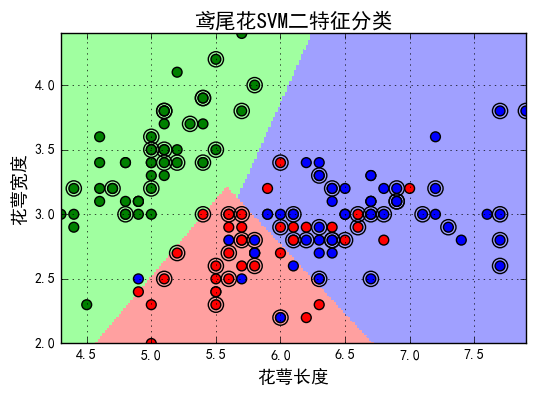

In [32]:
# 画图
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
# print 'grid_test = \n', grid_test
# Z = clf.decision_function(grid_test)    # 样本到决策面的距离
# print Z
grid_hat = clf.predict(grid_test)       # 预测分类值
print grid_hat
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
plt.grid()
plt.show()

预测正确的样本个数：69，正确率：86.25%
[[ 0.00041835  1.0003916   1.25158694  1.03912429  1.06272462  0.06194409]
 [ 0.73619309  0.99992928  1.00035655  1.01254723  1.0001967  -0.0689392 ]
 [-0.15399317  0.73429473  0.85195011  1.02091686  0.54511927 -0.30394945]
 [ 1.00009974  1.13669234  1.42106961  0.90744317  0.60940832 -0.33678376]
 [ 1.25490693  1.00737616  1.28386426  0.53541648  0.3328939  -0.23111811]]


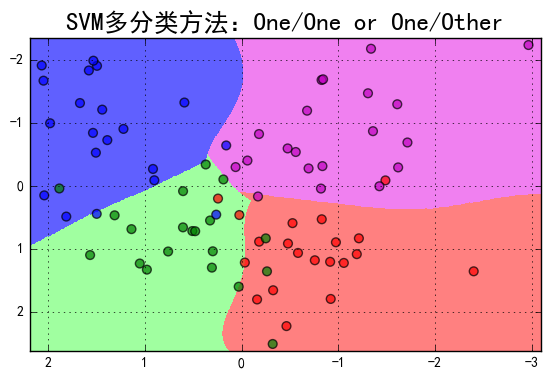

In [34]:
import numpy as np
from sklearn import svm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def extend(a, b, r):
    x = a - b
    m = (a + b) / 2
    return m-r*x/2, m+r*x/2


if __name__ == "__main__":
    np.random.seed(0)
    N = 20
    x = np.empty((4*N, 2))
    means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
    sigmas = [np.eye(2), 2*np.eye(2), np.diag((1,2)), np.array(((2,1),(1,2)))]
    for i in range(4):
        mn = stats.multivariate_normal(means[i], sigmas[i]*0.3)
        x[i*N:(i+1)*N, :] = mn.rvs(N)
    a = np.array((0,1,2,3)).reshape((-1, 1))
    y = np.tile(a, N).flatten()
    clf = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovo')
    # clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
    clf.fit(x, y)
    y_hat = clf.predict(x)
    acc = accuracy_score(y, y_hat)
    np.set_printoptions(suppress=True)
    print u'预测正确的样本个数：%d，正确率：%.2f%%' % (round(acc*4*N), 100*acc)
    # decision_function
    print clf.decision_function(x)[:5]
    # print y_hat

    x1_min, x2_min = np.min(x, axis=0)
    x1_max, x2_max = np.max(x, axis=0)
    x1_min, x1_max = extend(x1_min, x1_max, 1.05)
    x2_min, x2_max = extend(x2_min, x2_max, 1.05)
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
    x_test = np.stack((x1.flat, x2.flat), axis=1)
    y_test = clf.predict(x_test)
    y_test = y_test.reshape(x1.shape)
    cm_light = mpl.colors.ListedColormap(['#FF8080', '#A0FFA0', '#6060FF', '#F080F0'])
    cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'm'])
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, alpha=0.7)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(b=True)
    plt.tight_layout(pad=2.5)
    plt.title(u'SVM多分类方法：One/One or One/Other', fontsize=18)
    plt.show()


预测正确的样本个数：66，正确率：82.50%
[[ 2.09887682  3.09512828 -0.11808989  0.92408478]
 [ 3.21992603  2.12444698 -0.22925992  0.88488691]
 [ 2.02778059  3.05186938 -0.05966688  0.9800169 ]
 [ 3.10483818  2.04013998 -0.13845534  0.99347718]
 [ 3.17453664  1.0132656  -0.21401121  2.02620897]]


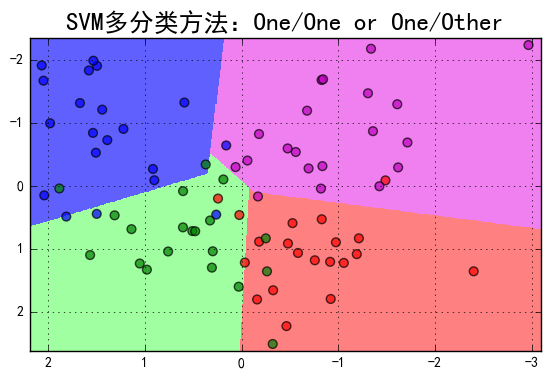

In [35]:
import numpy as np
from sklearn import svm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def extend(a, b, r):
    x = a - b
    m = (a + b) / 2
    return m-r*x/2, m+r*x/2


if __name__ == "__main__":
    np.random.seed(0)
    N = 20
    x = np.empty((4*N, 2))
    means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
    sigmas = [np.eye(2), 2*np.eye(2), np.diag((1,2)), np.array(((2,1),(1,2)))]
    for i in range(4):
        mn = stats.multivariate_normal(means[i], sigmas[i]*0.3)
        x[i*N:(i+1)*N, :] = mn.rvs(N)
    a = np.array((0,1,2,3)).reshape((-1, 1))
    y = np.tile(a, N).flatten()
    #clf = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovo')
    clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
    clf.fit(x, y)
    y_hat = clf.predict(x)
    acc = accuracy_score(y, y_hat)
    np.set_printoptions(suppress=True)
    print u'预测正确的样本个数：%d，正确率：%.2f%%' % (round(acc*4*N), 100*acc)
    # decision_function
    print clf.decision_function(x)[:5]
    # print y_hat

    x1_min, x2_min = np.min(x, axis=0)
    x1_max, x2_max = np.max(x, axis=0)
    x1_min, x1_max = extend(x1_min, x1_max, 1.05)
    x2_min, x2_max = extend(x2_min, x2_max, 1.05)
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
    x_test = np.stack((x1.flat, x2.flat), axis=1)
    y_test = clf.predict(x_test)
    y_test = y_test.reshape(x1.shape)
    cm_light = mpl.colors.ListedColormap(['#FF8080', '#A0FFA0', '#6060FF', '#F080F0'])
    cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'm'])
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, alpha=0.7)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(b=True)
    plt.tight_layout(pad=2.5)
    plt.title(u'SVM多分类方法：One/One or One/Other', fontsize=18)
    plt.show()


In [36]:
N = 20
x = np.empty((4*N, 2))
means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
sigmas = [np.eye(2), 2*np.eye(2), np.diag((1,2)), np.array(((2,1),(1,2)))]
for i in range(4):
    mn = stats.multivariate_normal(means[i], sigmas[i]*0.3)
    x[i*N:(i+1)*N, :] = mn.rvs(N)
x    

array([[-0.75962023,  1.34958924],
       [ 0.1041218 ,  0.86654589],
       [-0.15988361,  1.41887095],
       [-2.34557852,  0.06687317],
       [-0.76987268,  0.83669703],
       [-0.85561913,  1.40053084],
       [-0.87508069, -0.11106831],
       [-0.47079572,  0.89761871],
       [-1.25870297,  2.06075011],
       [-0.19082733,  0.95350377],
       [-0.76574094,  0.8333392 ],
       [-0.88792251,  0.95435381],
       [ 0.00174673,  0.86625739],
       [-0.73968892,  0.60880768],
       [-1.65011155,  1.33350325],
       [-0.7238258 ,  0.718473  ],
       [-0.55170258,  1.63349597],
       [-1.44019851,  0.6978969 ],
       [-1.18207053,  2.01028329],
       [-1.23156392,  1.26710207],
       [ 0.70888512,  1.17649244],
       [ 1.54515237,  0.38202687],
       [ 0.47645016,  0.28539869],
       [ 0.65252651,  1.1409604 ],
       [ 0.82952385,  1.01933098],
       [ 0.30914125,  1.44158269],
       [ 3.0629272 ,  1.31780885],
       [ 1.37618434,  2.01590409],
       [ 0.81746672,

In [37]:
sigmas

[array([[ 1.,  0.],
        [ 0.,  1.]]), array([[ 2.,  0.],
        [ 0.,  2.]]), array([[1, 0],
        [0, 2]]), array([[2, 1],
        [1, 2]])]